<h1>딥러닝 기초</h1>

In [1]:
# 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# 데이터셋
from sklearn.datasets import load_diabetes
X, y_numeric = load_diabetes(return_X_y=True)
# numpy 형태로 y를 배열
y = np.array([ 0 if y_numeric[i]<140 else 1 for i in range(len(y_numeric)) ])
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.4,random_state=42)

# Scikit-learn을 이용한 인공신경망

In [3]:
from sklearn.neural_network import MLPClassifier
f = MLPClassifier(
        hidden_layer_sizes = (10,5),
        activation = 'logistic',
        solver = 'lbfgs', # for small data set, sgd/adam for large data set
        alpha = 0.01, # L2 regularization
        batch_size = 'auto',
        learning_rate = 'constant',
        learning_rate_init = 0.001,
        random_state = 0,
        max_iter = 10000)

In [4]:
f.fit(xtrain,ytrain)
print( f.score(xtrain,ytrain), f.score(xtest,ytest) )

0.9962264150943396 0.711864406779661


# Tensorflow를 이용한 인공신경망

In [5]:
# 텐서플로우 라이브러리
import tensorflow as tf

신경망 모델의 선언

In [6]:
# 인공신경망 모델
model = tf.keras.models.Sequential()
model.add( tf.keras.layers.Input(shape=(10,)) )     # 입력 변수의 수 10
model.add( tf.keras.layers.Dense(10,activation='sigmoid') )
model.add( tf.keras.layers.Dense(5,activation='sigmoid') )
model.add( tf.keras.layers.Dense(2,activation='softmax'))

In [7]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

모델 훈련

In [8]:
model.fit(xtrain,ytrain,epochs=5) # 최초 ５번

Epoch 1/5
9/9 [==============================] - 2s 7ms/step - loss: 0.9480 - accuracy: 0.5094
Epoch 2/5
9/9 [==============================] - 0s 5ms/step - loss: 0.9156 - accuracy: 0.5094
Epoch 3/5
9/9 [==============================] - 0s 9ms/step - loss: 0.8833 - accuracy: 0.5094
Epoch 4/5
9/9 [==============================] - 0s 12ms/step - loss: 0.8564 - accuracy: 0.5094
Epoch 5/5
9/9 [==============================] - 0s 5ms/step - loss: 0.8289 - accuracy: 0.5094


In [ ]:
model.fit(xtrain,ytrain,epochs=1000) # 추가 1000 번

In [10]:
model.fit(xtrain,ytrain,epochs=5)   # 추가 ５ 번

Epoch 1/5
9/9 [==============================] - 0s 3ms/step - loss: 0.5134 - accuracy: 0.7321
Epoch 2/5
9/9 [==============================] - 0s 3ms/step - loss: 0.5129 - accuracy: 0.7321
Epoch 3/5
9/9 [==============================] - 0s 4ms/step - loss: 0.5130 - accuracy: 0.7245
Epoch 4/5
9/9 [==============================] - 0s 3ms/step - loss: 0.5133 - accuracy: 0.7245
Epoch 5/5
9/9 [==============================] - 0s 4ms/step - loss: 0.5135 - accuracy: 0.7245


모델의 모습

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 2)                 12        
                                                                 
Total params: 177
Trainable params: 177
Non-trainable params: 0
_________________________________________________________________


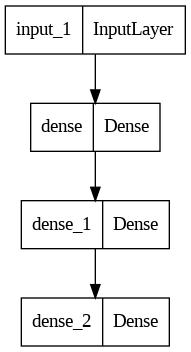

In [12]:
tf.keras.utils.plot_model(model)

모델을 이용한 예측

In [13]:
xtrain[0]

array([-0.01277963, -0.04464164,  0.06061839,  0.05285804,  0.04796534,
        0.02937467, -0.01762938,  0.03430886,  0.07020738,  0.00720652])

In [14]:
model.predict(xtrain[[0]])

1/1 [==============================] - 0s 117ms/step


array([[0.08856107, 0.91143894]], dtype=float32)

모델 평가

In [15]:
model.evaluate(xtrain,ytrain)

9/9 [==============================] - 0s 3ms/step - loss: 0.5132 - accuracy: 0.7245


[0.5132156014442444, 0.7245283126831055]

In [16]:
model.evaluate(xtest,ytest)

6/6 [==============================] - 0s 3ms/step - loss: 0.4408 - accuracy: 0.7853


[0.440816730260849, 0.7853107452392578]

# 연습문제

1. 위의 딥러닝 모델에서 첫 번째 Dense 계층(노드 수 10)와 두 번째 Dense 계층 (노드 수 5) 사이에 계층 정규화 (Layer Normalization)를 추가하시오. 계층 정규화는
```
 tf.keras.layers.LayerNormalization()
```
를 추가하여 구현할 수 있다. <br>
이 모델을 에폭 1,000번 반복하여 훈련하였을 때, 훈련데이터와 평가데이터의 성능은 어떻게 나타나는가? 이 모델의 파라메터의 수는 모두 몇 개인가? 계층 정규화에서 추가된 파라메터는 몇 개인가? 그 이유를 설명하시오.



2. 아래와 같이 MNIST 데이터셋을 읽어, 숫자를 판별하는 인공신경망 모델을 텐서플로우를 이용하여 만들고 성능을 평가하시오. 모델의 구조는 자유롭게 결정하고 필요하다면 추가적인 정규화나 규제화 기법을 사용하시오.

In [ ]:
from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True)
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.33,random_state=1)